# Disney Movies Analysis

**Data**: Data world. https://data.world/kgarrett/disney-character-success-00-16

**Expectation**: I intended to find out the most profitable movies, at what time, and what are the genres. I thought the most popular movies were adventure and musical (animation), and they are also the main productions and most profitable. 

**Results**: Adventure movies, the second largest number of movies, 129 out of 579, are definitely the most popular and profitable. Especially after the Star war series produced. Musical movies (animation), only 16/579, but made up the top three highest profits. 
Action movies, only 40/579, also made up the top three highest profits. 
The largest number of movies, Comedy,182/579, did not make a high profit. 

# **Import Data and make a clean dataframe**

In [1]:
%matplotlib inline
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as datetime

import pydotplus
from scipy.cluster import hierarchy
from sklearn import decomposition, preprocessing, cluster, tree
from yellowbrick.cluster.silhouette import SilhouetteVisualizer

In [2]:
df = pd.read_csv('disney_movies_total_gross.csv')
df

,movie_title,release_date,genre,MPAA_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,"Dec 21, 1937",Musical,G,"$184,925,485","$5,228,953,251"
1,Pinocchio,"Feb 9, 1940",Adventure,G,"$84,300,000","$2,188,229,052"
2,Fantasia,"Nov 13, 1940",Musical,G,"$83,320,000","$2,187,090,808"
3,Song of the South,"Nov 12, 1946",Adventure,G,"$65,000,000","$1,078,510,579"
4,Cinderella,"Feb 15, 1950",Drama,G,"$85,000,000","$920,608,730"
...,...,...,...,...,...,...
574,The Light Between Oceans,"Sep 2, 2016",Drama,PG-13,"$12,545,979","$12,545,979"
575,Queen of Katwe,"Sep 23, 2016",Drama,PG,"$8,874,389","$8,874,389"
576,Doctor Strange,"Nov 4, 2016",Adventure,PG-13,"$232,532,923","$232,532,923"
577,Moana,"Nov 23, 2016",Adventure,PG,"$246,082,029","$246,082,029"


In [3]:
col=['release_date','inflation_adjusted_gross','total_gross','genre','MPAA_rating']
df1 = df.reindex(columns=col)
df1

,release_date,inflation_adjusted_gross,total_gross,genre,MPAA_rating
0,"Dec 21, 1937","$5,228,953,251","$184,925,485",Musical,G
1,"Feb 9, 1940","$2,188,229,052","$84,300,000",Adventure,G
2,"Nov 13, 1940","$2,187,090,808","$83,320,000",Musical,G
3,"Nov 12, 1946","$1,078,510,579","$65,000,000",Adventure,G
4,"Feb 15, 1950","$920,608,730","$85,000,000",Drama,G
...,...,...,...,...,...
574,"Sep 2, 2016","$12,545,979","$12,545,979",Drama,PG-13
575,"Sep 23, 2016","$8,874,389","$8,874,389",Drama,PG
576,"Nov 4, 2016","$232,532,923","$232,532,923",Adventure,PG-13
577,"Nov 23, 2016","$246,082,029","$246,082,029",Adventure,PG


In [4]:
df1.dtypes

release_date                object
inflation_adjusted_gross    object
total_gross                 object
genre                       object
MPAA_rating                 object
dtype: object

# Change numerical values from object to integer

In [5]:
df1['inflation_adjusted_gross'] = df1['inflation_adjusted_gross'].str.replace(',','')
df1['inflation_adjusted_gross'] = df1['inflation_adjusted_gross'].str.replace('$','')
df1['total_gross'] = df1['total_gross'].str.replace(',','')
df1['total_gross'] = df1['total_gross'].str.replace('$','')
df1

/var/folders/cy/hnt23g7j4sd1zbn957mjj6tw0000gn/T/ipykernel_33321/3260996265.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1['inflation_adjusted_gross'] = df1['inflation_adjusted_gross'].str.replace('$','')
/var/folders/cy/hnt23g7j4sd1zbn957mjj6tw0000gn/T/ipykernel_33321/3260996265.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1['total_gross'] = df1['total_gross'].str.replace('$','')


,release_date,inflation_adjusted_gross,total_gross,genre,MPAA_rating
0,"Dec 21, 1937",5228953251,184925485,Musical,G
1,"Feb 9, 1940",2188229052,84300000,Adventure,G
2,"Nov 13, 1940",2187090808,83320000,Musical,G
3,"Nov 12, 1946",1078510579,65000000,Adventure,G
4,"Feb 15, 1950",920608730,85000000,Drama,G
...,...,...,...,...,...
574,"Sep 2, 2016",12545979,12545979,Drama,PG-13
575,"Sep 23, 2016",8874389,8874389,Drama,PG
576,"Nov 4, 2016",232532923,232532923,Adventure,PG-13
577,"Nov 23, 2016",246082029,246082029,Adventure,PG


In [6]:
df1['inflation_adjusted_gross'] = df1.inflation_adjusted_gross.astype(int)
df1['total_gross'] = df1.total_gross.astype(int)
df1

,release_date,inflation_adjusted_gross,total_gross,genre,MPAA_rating
0,"Dec 21, 1937",5228953251,184925485,Musical,G
1,"Feb 9, 1940",2188229052,84300000,Adventure,G
2,"Nov 13, 1940",2187090808,83320000,Musical,G
3,"Nov 12, 1946",1078510579,65000000,Adventure,G
4,"Feb 15, 1950",920608730,85000000,Drama,G
...,...,...,...,...,...
574,"Sep 2, 2016",12545979,12545979,Drama,PG-13
575,"Sep 23, 2016",8874389,8874389,Drama,PG
576,"Nov 4, 2016",232532923,232532923,Adventure,PG-13
577,"Nov 23, 2016",246082029,246082029,Adventure,PG


In [7]:
df1=df1.sort_values('inflation_adjusted_gross', ascending=False) 
df1

,release_date,inflation_adjusted_gross,total_gross,genre,MPAA_rating
0,"Dec 21, 1937",5228953251,184925485,Musical,G
1,"Feb 9, 1940",2188229052,84300000,Adventure,G
2,"Nov 13, 1940",2187090808,83320000,Musical,G
8,"Jan 25, 1961",1362870985,153000000,Comedy,G
6,"Jun 22, 1955",1236035515,93600000,Drama,G
...,...,...,...,...,...
511,"Apr 22, 2011",2984,2815,Adventure,PG
27,"Mar 20, 1981",0,0,Drama,NaN
20,"Mar 11, 1977",0,0,NaN,NaN
355,"Jan 1, 2002",0,0,NaN,NaN


In [8]:
df1.dtypes

release_date                object
inflation_adjusted_gross     int64
total_gross                  int64
genre                       object
MPAA_rating                 object
dtype: object

# Check missing data

In [9]:
df1.isna()

,release_date,inflation_adjusted_gross,total_gross,genre,MPAA_rating
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
8,False,False,False,False,False
6,False,False,False,False,False
...,...,...,...,...,...
511,False,False,False,False,False
27,False,False,False,False,True
20,False,False,False,True,True
355,False,False,False,True,True


In [10]:
df1.isna().sum()

release_date                 0
inflation_adjusted_gross     0
total_gross                  0
genre                       17
MPAA_rating                 56
dtype: int64

In [11]:
df1['release_date'] = pd.to_datetime(df1['release_date'])

In [12]:
df1.dtypes

release_date                datetime64[ns]
inflation_adjusted_gross             int64
total_gross                          int64
genre                               object
MPAA_rating                         object
dtype: object

# Make plots

<AxesSubplot:xlabel='release_date'>

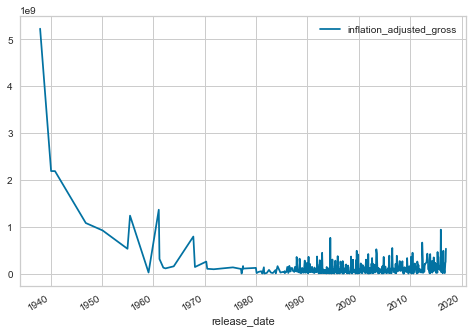

In [13]:
df1.plot(kind='line', x='release_date', y='inflation_adjusted_gross')

<AxesSubplot:xlabel='release_date'>

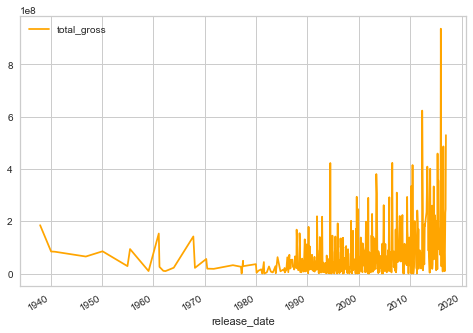

In [14]:
df1.plot(kind='line', x='release_date', y='total_gross', color='orange')

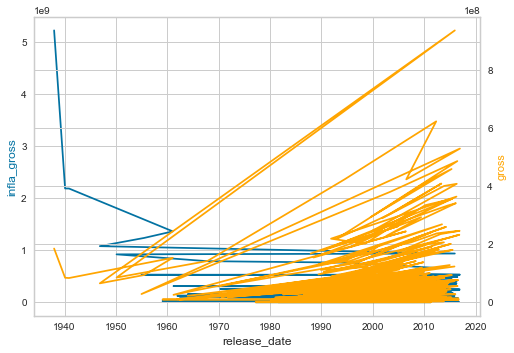

In [15]:
fig,ax = plt.subplots()
ax.plot(df1.release_date, df1.inflation_adjusted_gross, color='b')

ax.set_xlabel('release_date', fontsize=12)
ax.set_ylabel('infla_gross', color='b',fontsize=12)

ax2 = ax.twinx()
ax2.plot(df1.release_date, df1['total_gross'],color='orange')
ax2.set_ylabel('gross', color='orange')

plt.show()

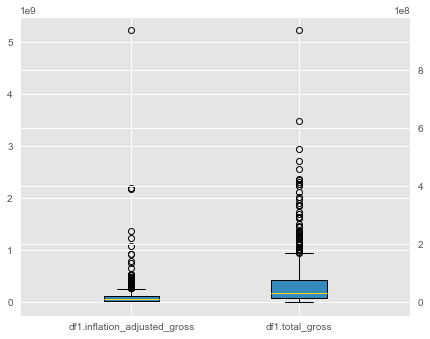

In [16]:
plt.style.use('ggplot')

fig,ax1 = plt.subplots(figsize=(7,5.5))

props = dict(widths=1, patch_artist=True, medianprops=dict(color='gold'))
box1=ax1.boxplot(df1['inflation_adjusted_gross'].values, positions=[2], **props)

ax2 = ax1.twinx()
box2=ax2.boxplot(df1['total_gross'].values, positions=[5], **props)

ax1.set_xlim(0,7)
ax1.set_xticks([2,5])
ax1.set_xticklabels(['df1.inflation_adjusted_gross','df1.total_gross'])



plt.show()


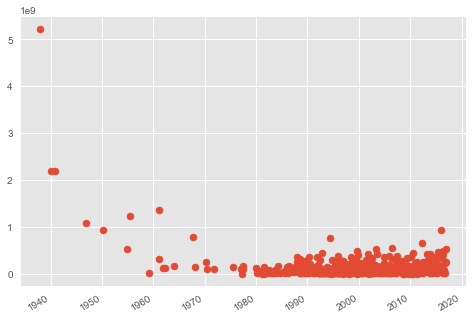

In [17]:
plt.scatter(df1.release_date, df1.inflation_adjusted_gross)
plt.gcf().autofmt_xdate()
plt.show()

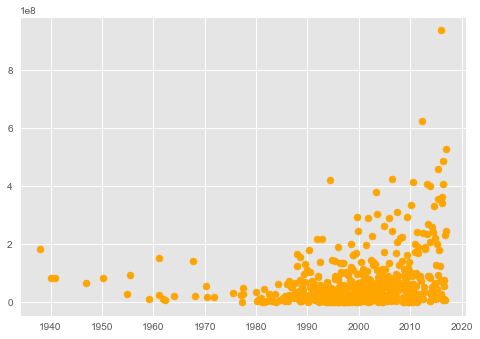

In [18]:
plt.scatter(df1.release_date, df1.total_gross, color='orange')
plt.show()

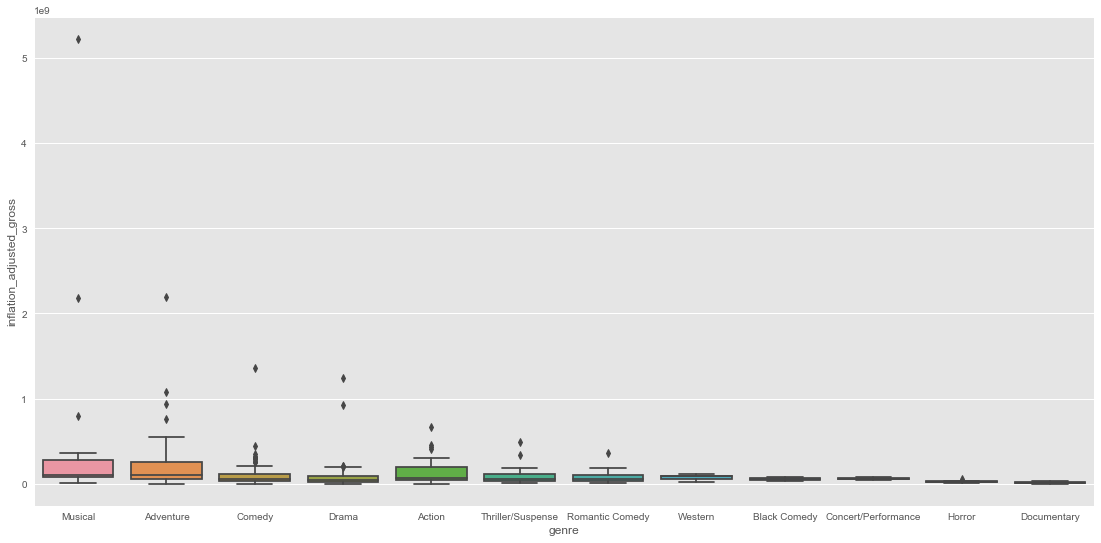

In [23]:
# inflation_adjusted_gross VS genre

plt.figure(figsize=(19,9))
sns.boxplot(x='genre', y='inflation_adjusted_gross', data=df1)

plt.savefig('boxp1.png', bbox_inches='tight',dpi=1200)

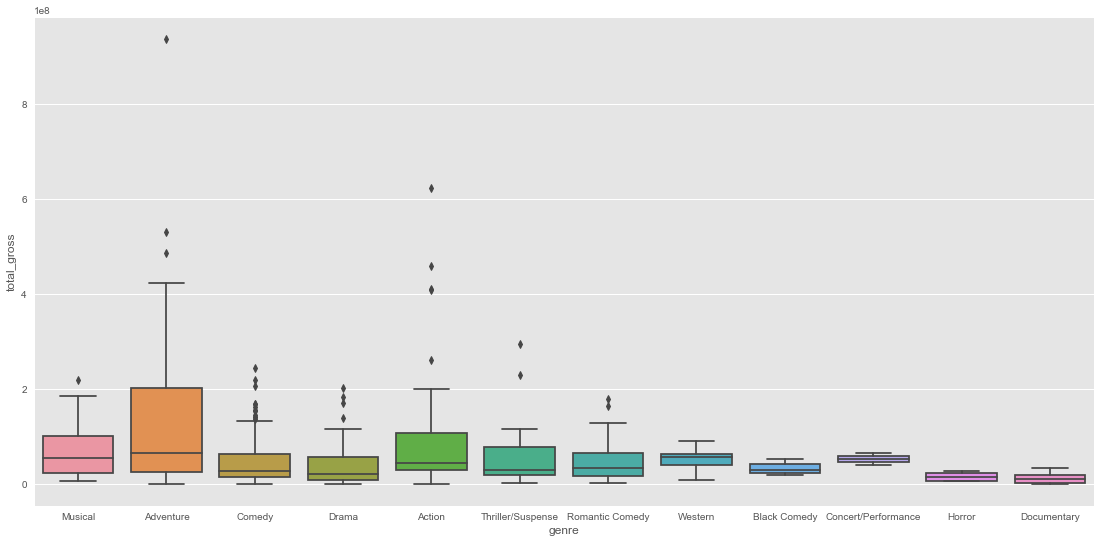

In [19]:
# total_gross VS genre

plt.figure(figsize=(19,9))
sns.boxplot(x='genre', y='total_gross', data=df1)

plt.savefig('boxp1.png', bbox_inches='tight',dpi=1200)

In [21]:
sns.choose_colorbrewer_palette('qualitative')

interactive(children=(Dropdown(description='name', options=('Set1', 'Set2', 'Set3', 'Paired', 'Accent', 'Paste…

[(0.8941176470588235, 0.10196078431372557, 0.10980392156862737),
 (0.21568627450980393, 0.4941176470588236, 0.7215686274509804),
 (0.3019607843137256, 0.6862745098039216, 0.29019607843137263),
 (0.5960784313725492, 0.3058823529411765, 0.6392156862745098),
 (1.0, 0.4980392156862745, 0.0),
 (0.9999999999999998, 1.0, 0.19999999999999996),
 (0.6509803921568629, 0.33725490196078434, 0.1568627450980391),
 (0.9686274509803922, 0.5058823529411766, 0.7490196078431374),
 (0.6, 0.6, 0.6)]

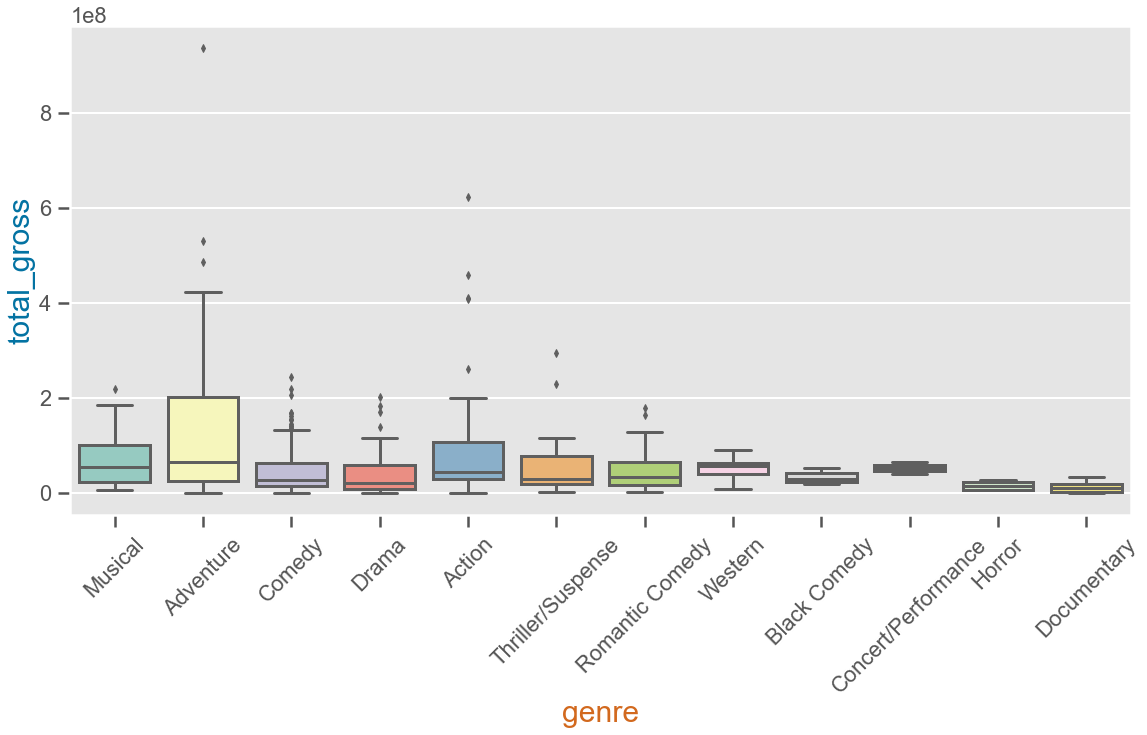

In [22]:
with sns.color_palette('Set3'):
    with sns.plotting_context('poster'):
        fig, ax = plt.subplots(figsize=(19, 9))
        ax.set_xlabel('genre', fontsize=30, color='chocolate')
        ax.set_ylabel('total_gross', fontsize=30, color='b')
        sns.boxplot(x='genre', y='total_gross', data=df1, ax=ax)
        ax.tick_params(axis='x', labelrotation=45)

fig.savefig('boxp2.png', bbox_inches='tight',dpi=1200)

In [24]:
df1.genre.value_counts(dropna=False)

Comedy                 182
Adventure              129
Drama                  114
Action                  40
Thriller/Suspense       24
Romantic Comedy         23
NaN                     17
Musical                 16
Documentary             16
Western                  7
Horror                   6
Black Comedy             3
Concert/Performance      2
Name: genre, dtype: int64

Based on analysis above, find out the relationship between total gross and gener of movies, and the number of each gener. 

In [25]:
#Remove the datetime column 
df2=df1.drop('release_date', axis=1)
df2

,inflation_adjusted_gross,total_gross,genre,MPAA_rating
0,5228953251,184925485,Musical,G
1,2188229052,84300000,Adventure,G
2,2187090808,83320000,Musical,G
8,1362870985,153000000,Comedy,G
6,1236035515,93600000,Drama,G
...,...,...,...,...
511,2984,2815,Adventure,PG
27,0,0,Drama,NaN
20,0,0,NaN,NaN
355,0,0,NaN,NaN


In [26]:
df2.MPAA_rating.value_counts(dropna=True)

PG           187
PG-13        145
R            102
G             86
Not Rated      3
Name: MPAA_rating, dtype: int64

In [27]:
df2.genre.value_counts(dropna=True)

Comedy                 182
Adventure              129
Drama                  114
Action                  40
Thriller/Suspense       24
Romantic Comedy         23
Musical                 16
Documentary             16
Western                  7
Horror                   6
Black Comedy             3
Concert/Performance      2
Name: genre, dtype: int64

In [31]:
# create numbers for categories, use .get_dummies
ds = pd.get_dummies(df2) #drop_first=True
ds

,inflation_adjusted_gross,total_gross,genre_Action,genre_Adventure,genre_Black Comedy,genre_Comedy,genre_Concert/Performance,genre_Documentary,genre_Drama,genre_Horror,genre_Musical,genre_Romantic Comedy,genre_Thriller/Suspense,genre_Western,MPAA_rating_G,MPAA_rating_Not Rated,MPAA_rating_PG,MPAA_rating_PG-13,MPAA_rating_R
0,5228953251,184925485,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,2188229052,84300000,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,2187090808,83320000,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
8,1362870985,153000000,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
6,1236035515,93600000,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,2984,2815,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
27,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
355,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [32]:
#PCA 

X = ds
std = preprocessing.StandardScaler()
X_std = pd.DataFrame(std.fit_transform(X), columns=X.columns)
X_std

,inflation_adjusted_gross,total_gross,genre_Action,genre_Adventure,genre_Black Comedy,genre_Comedy,genre_Concert/Performance,genre_Documentary,genre_Drama,genre_Horror,genre_Musical,genre_Romantic Comedy,genre_Thriller/Suspense,genre_Western,MPAA_rating_G,MPAA_rating_Not Rated,MPAA_rating_PG,MPAA_rating_PG-13,MPAA_rating_R
0,17.877919,1.293665,-0.272418,-0.535413,-0.072169,-0.677081,-0.058874,-0.16858,-0.495138,-0.102329,5.931905,-0.203389,-0.20795,-0.110624,2.394276,-0.072169,-0.690681,-0.578015,-0.462425
1,7.239995,0.210886,-0.272418,1.867718,-0.072169,-0.677081,-0.058874,-0.16858,-0.495138,-0.102329,-0.168580,-0.203389,-0.20795,-0.110624,2.394276,-0.072169,-0.690681,-0.578015,-0.462425
2,7.236013,0.200341,-0.272418,-0.535413,-0.072169,-0.677081,-0.058874,-0.16858,-0.495138,-0.102329,5.931905,-0.203389,-0.20795,-0.110624,2.394276,-0.072169,-0.690681,-0.578015,-0.462425
3,4.352493,0.950131,-0.272418,-0.535413,-0.072169,1.476929,-0.058874,-0.16858,-0.495138,-0.102329,-0.168580,-0.203389,-0.20795,-0.110624,2.394276,-0.072169,-0.690681,-0.578015,-0.462425
4,3.908761,0.310959,-0.272418,-0.535413,-0.072169,-0.677081,-0.058874,-0.16858,2.019640,-0.102329,-0.168580,-0.203389,-0.20795,-0.110624,2.394276,-0.072169,-0.690681,-0.578015,-0.462425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574,-0.415478,-0.696192,-0.272418,1.867718,-0.072169,-0.677081,-0.058874,-0.16858,-0.495138,-0.102329,-0.168580,-0.203389,-0.20795,-0.110624,-0.417663,-0.072169,1.447846,-0.578015,-0.462425
575,-0.415489,-0.696222,-0.272418,-0.535413,-0.072169,-0.677081,-0.058874,-0.16858,2.019640,-0.102329,-0.168580,-0.203389,-0.20795,-0.110624,-0.417663,-0.072169,-0.690681,-0.578015,-0.462425
576,-0.415489,-0.696222,-0.272418,-0.535413,-0.072169,-0.677081,-0.058874,-0.16858,-0.495138,-0.102329,-0.168580,-0.203389,-0.20795,-0.110624,-0.417663,-0.072169,-0.690681,-0.578015,-0.462425
577,-0.415489,-0.696222,-0.272418,-0.535413,-0.072169,-0.677081,-0.058874,-0.16858,-0.495138,-0.102329,-0.168580,-0.203389,-0.20795,-0.110624,-0.417663,-0.072169,-0.690681,-0.578015,-0.462425


In [33]:
pca = decomposition.PCA()
pca_X = pd.DataFrame(pca.fit_transform(X_std), columns=[f'PC{i+1}'for i in range(len(X.columns))])
pca_X

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19
0,9.984734,4.464045,3.355231,3.903773,6.536774,7.251778,-2.771396,-1.301098,1.334703,0.034683,-0.137355,-0.608653,-2.272573,-1.275993,5.930436,-2.455506,7.966609,-0.102018,0.017856
1,5.163467,1.667806,1.275597,0.036610,1.652348,0.924472,-1.236806,-0.274437,0.168832,0.071825,-0.045109,-1.029650,-0.336432,0.773415,2.196377,-2.273190,3.942640,-0.243400,0.006433
2,5.290402,2.206129,3.226630,2.858066,2.946081,4.196348,-1.669113,-0.962613,1.045091,0.068235,-0.158682,-0.125574,-1.910790,-1.621538,0.689025,-0.377428,2.463810,-0.129729,-0.009551
3,2.900791,0.344317,1.023630,1.531676,1.870366,0.338319,-1.583724,0.410222,0.100022,-0.026635,0.028515,-1.281890,-0.167825,0.623927,2.254152,-1.794228,0.982304,-0.116312,0.050717
4,2.164904,1.560812,1.626502,-0.180759,0.045414,1.853242,-1.505494,0.578453,0.005153,-0.094492,0.025568,-0.949252,-0.241499,0.274731,2.035676,-2.322852,0.872344,-0.151525,0.045646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574,0.857515,-1.342793,-0.610735,-1.315986,-0.635595,-0.171654,0.539877,-0.454441,-0.115689,0.072731,-0.063577,0.521112,-0.023413,-0.174141,-1.100357,0.072312,0.870810,-0.210243,-0.042677
575,-1.100051,0.340419,0.523876,-0.805123,-1.136903,1.229764,-0.465944,0.399867,-0.184807,-0.057995,-0.019293,-0.147815,0.141853,-0.054847,-0.086350,-0.567233,-0.139073,1.021126,-0.168628
576,-0.487663,-0.109447,0.288673,0.026185,-0.305822,-0.159995,0.042601,-0.032548,0.052956,0.006501,-0.030345,0.028155,-0.109102,-0.068560,-0.553606,-0.170972,0.251486,1.156623,0.941057
577,-0.487663,-0.109447,0.288673,0.026185,-0.305822,-0.159995,0.042601,-0.032548,0.052956,0.006501,-0.030345,0.028155,-0.109102,-0.068560,-0.553606,-0.170972,0.251486,1.156623,0.941057


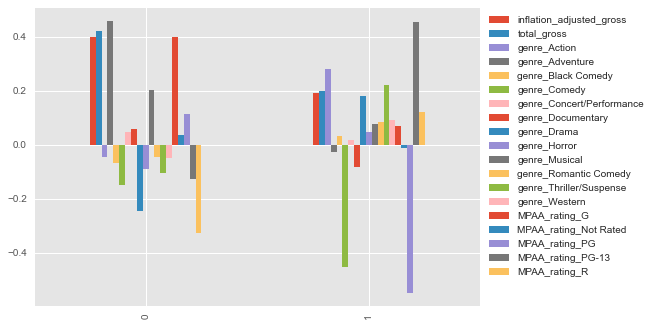

In [34]:
# What columns make up the components 1 & 2?
# 1 - infla_gross, total_gross,genre_adventure, musical, MPAA-rating_G,
# 2 - infla_gross, total_gross,genre_action,drama,Thriller, PG-13

(pd.DataFrame(pca.components_, columns=X.columns)
.iloc[:2]
.plot.bar()
.legend(bbox_to_anchor=(1,1)))

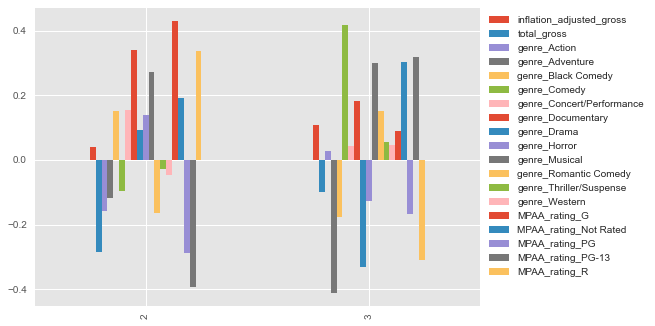

In [35]:
# What columns make up the components 3& 4?
# 3 - infla_gross, genre_black comedy,concert,documentary,drama,musical, rating G,R
# 4 - infla_gross,genre_comedy,documentary,musical,romantic comedy, not rated,PG-13

(pd.DataFrame(pca.components_, columns=X.columns)
.iloc[2:4]
.plot.bar()
.legend(bbox_to_anchor=(1,1)))

**Clustering**

<AxesSubplot:>

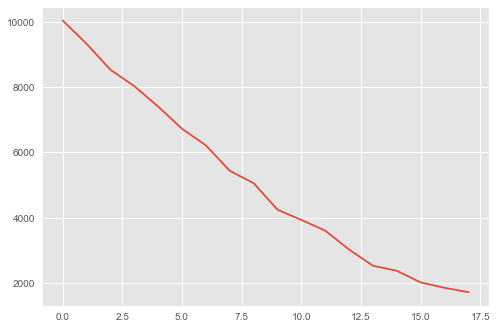

In [36]:
inerts = []
for i in range(2, 20):
    k = cluster.KMeans(n_clusters=i, random_state=42)
    k.fit(X_std)
    inerts.append(k.inertia_)
    
pd.Series(inerts).plot()

In [37]:
k9 = cluster.KMeans(n_clusters=9, random_state=42)
k9.fit(X_std)
labels = k9.predict(X_std)

In [38]:
X.assign(label=labels)

,inflation_adjusted_gross,total_gross,genre_Action,genre_Adventure,genre_Black Comedy,genre_Comedy,genre_Concert/Performance,genre_Documentary,genre_Drama,genre_Horror,genre_Musical,genre_Romantic Comedy,genre_Thriller/Suspense,genre_Western,MPAA_rating_G,MPAA_rating_Not Rated,MPAA_rating_PG,MPAA_rating_PG-13,MPAA_rating_R,label
0,5228953251,184925485,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,7
1,2188229052,84300000,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2
2,2187090808,83320000,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,7
8,1362870985,153000000,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
6,1236035515,93600000,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,2984,2815,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2
27,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5
20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
355,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [39]:
(X.assign(label=labels)
  .groupby('label')
  .agg(['mean', 'var'])
  .T
)

label                                      0             1             2  \
inflation_adjusted_gross  mean  7.777708e+07  8.036241e+07  1.903974e+08   
                          var   6.376869e+15  1.375807e+16  6.482196e+16   
total_gross               mean  5.009595e+07  4.261213e+07  1.270471e+08   
                          var   2.447828e+15  1.963126e+15  2.020476e+16   
genre_Action              mean  0.000000e+00  0.000000e+00  0.000000e+00   
                          var   0.000000e+00  0.000000e+00  0.000000e+00   
genre_Adventure           mean  0.000000e+00  0.000000e+00  1.000000e+00   
                          var   0.000000e+00  0.000000e+00  0.000000e+00   
genre_Black Comedy        mean  0.000000e+00  0.000000e+00  0.000000e+00   
                          var   0.000000e+00  0.000000e+00  0.000000e+00   
genre_Comedy              mean  0.000000e+00  8.921569e-01  0.000000e+00   
                          var   0.000000e+00  9.668695e-02  0.000000e+00   
genre_Concert/Performance mean  0.000000e+00  9.803922e-03  0.000000e+00   
                          var   0.000000e+00  9.755626e-03  0.000000e+00   
genre_Documentary         mean  0.000000e+00  0.000000e+00  0.000000e+00   
                          var   0.000000e+00  0.000000e+00  0.000000e+00   
genre_Drama               mean  0.000000e+00  0.000000e+00  0.000000e+00   
                          var   0.000000e+00  0.000000e+00  0.000000e+00   
genre_Horror              mean  0.000000e+00  0.000000e+00  0.000000e+00   
                          var   0.000000e+00  0.000000e+00  0.000000e+00   
genre_Musical             mean  0.000000e+00  0.000000e+00  0.000000e+00   
                          var   0.000000e+00  0.000000e+00  0.000000e+00   
genre_Romantic Comedy     mean  1.000000e+00  0.000000e+00  0.000000e+00   
                          var   0.000000e+00  0.000000e+00  0.000000e+00   
genre_Thriller/Suspense   mean  0.000000e+00  0.000000e+00  0.000000e+00   
                          var   0.000000e+00  0.000000e+00  0.000000e+00   
genre_Western             mean  0.000000e+00  3.431373e-02  0.000000e+00   
                          var   0.000000e+00  3.329953e-02  0.000000e+00   
MPAA_rating_G             mean  4.347826e-02  9.313725e-02  3.255814e-01   
                          var   4.347826e-02  8.487878e-02  2.212936e-01   
MPAA_rating_Not Rated     mean  0.000000e+00  4.901961e-03  0.000000e+00   
                          var   0.000000e+00  4.901961e-03  0.000000e+00   
MPAA_rating_PG            mean  3.043478e-01  3.921569e-01  4.418605e-01   
                          var   2.213439e-01  2.395441e-01  2.485465e-01   
MPAA_rating_PG-13         mean  5.217391e-01  2.205882e-01  1.317829e-01   
                          var   2.608696e-01  1.727760e-01  1.153101e-01   
MPAA_rating_R             mean  8.695652e-02  1.568627e-01  2.325581e-02   
                          var   8.300395e-02  1.329083e-01  2.289244e-02   

label                                      3             4             5  \
inflation_adjusted_gross  mean  8.965379e+07  1.374734e+08  6.915095e+07   
                          var   1.257064e+16  2.111504e+16  2.026999e+16   
total_gross               mean  5.861694e+07  1.046141e+08  3.480807e+07   
                          var   5.026106e+15  1.961742e+16  1.460547e+15   
genre_Action              mean  0.000000e+00  1.000000e+00  0.000000e+00   
                          var   0.000000e+00  0.000000e+00  0.000000e+00   
genre_Adventure           mean  0.000000e+00  0.000000e+00  0.000000e+00   
                          var   0.000000e+00  0.000000e+00  0.000000e+00   
genre_Black Comedy        mean  0.000000e+00  0.000000e+00  2.479339e-02   
                          var   0.000000e+00  0.000000e+00  2.438017e-02   
genre_Comedy              mean  0.000000e+00  0.000000e+00  0.000000e+00   
                          var   0.000000e+00  0.000000e+00  0.000000e+00   
genre_Concert/Performance mean  0.000000e+00  0

In [40]:
# how many in each cluster?
pd.Series(labels).value_counts().sort_index()

0     23
1    204
2    129
3     24
4     40
5    121
6      6
7     16
8     16
dtype: int64

In [41]:
#add colors 
#the most related is in blue 
#sorted value by inflation_total_gross
#previously,  total_gross, Adventure in label 0, now in label 2


(X.assign(label=labels)
.groupby('label')
.mean()
.T
.style.background_gradient(cmap='RdBu', axis=1)
)

label,0,1,2,3,4,5,6,7,8
inflation_adjusted_gross,77777084.043478,80362410.799020,190397412.077519,89653789.750000,137473419.650000,69150951.049587,23413848.666667,603597861.000000,12718026.125000
total_gross,50095950.217391,42612129.029412,127047050.023256,58616938.291667,104614082.050000,34808070.049587,14511478.666667,72330259.687500,11292851.187500
genre_Action,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
genre_Adventure,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
genre_Black Comedy,0.000000,0.000000,0.000000,0.000000,0.000000,0.024793,0.000000,0.000000,0.000000
genre_Comedy,0.000000,0.892157,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
genre_Concert/Performance,0.000000,0.009804,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
genre_Documentary,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
genre_Drama,0.000000,0.000000,0.000000,0.000000,0.000000,0.942149,0.000000,0.000000,0.000000
genre_Horror,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
